In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [8]:
# 1. SimpleRNN - without Normalization

X = [[[i + j] for i in range(5)] for j in range(100)]

X[:3], X[-3:]

([[[0], [1], [2], [3], [4]],
  [[1], [2], [3], [4], [5]],
  [[2], [3], [4], [5], [6]]],
 [[[97], [98], [99], [100], [101]],
  [[98], [99], [100], [101], [102]],
  [[99], [100], [101], [102], [103]]])

In [11]:
y = [(i + 5) for i in range(100)]

y[:3], y[-3:]

([5, 6, 7], [102, 103, 104])

In [12]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [13]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 5, 1), (20, 5, 1), (80,), (20,))

In [14]:
# Unit(output_dim) : 3
# input_shape(input_length, input_dim): (5,1)
# return_sequences = False : 최종 Unit만 출력
# layers.Dense(1): y_hat

from tensorflow.keras import models, layers

model_1 = models.Sequential(name = 'SimpleRNN_1')
model_1.add(layers.SimpleRNN(3,
                             input_shape = (5,1),
                             return_sequences = False))
model_1.add(layers.Dense(1))

model_1.summary()

Model: "SimpleRNN_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn (SimpleRNN)       (None, 3)                 15        
_________________________________________________________________
dense (Dense)                (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [15]:
model_1.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])

In [16]:
Hist_1 = model_1.fit(X_train, y_train,
                     epochs=100,
                     batch_size=8,
                     validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 27ms/step - loss: 3552.7617 - accuracy: 0.0000e+00 - val_loss: 3501.2266 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 3548.5532 - accuracy: 0.0000e+00 - val_loss: 3497.1321 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 3544.5044 - accuracy: 0.0000e+00 - val_loss: 3492.9839 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 3540.5046 - accuracy: 0.0000e+00 - val_loss: 3488.7739 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 3536.2957 - accuracy: 0.0000e+00 - val_loss: 3484.6665 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 3532.2825 - accuracy: 0.0000e+00 - val_loss: 3480.5190 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - lo

In [17]:
y_hat = model_1.predict(X_test)

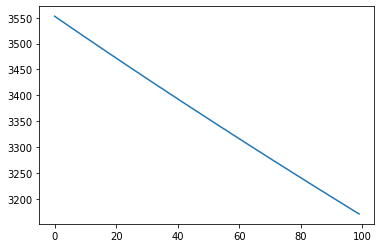

In [18]:
plt.plot(Hist_1.history['loss'])
plt.show()

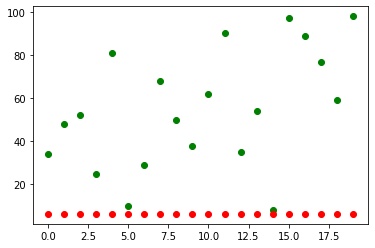

In [20]:
# 녹색 -> 정답(y_test)
# 빨간색 -> 예측(y_hat)

plt.scatter(range(20), y_test, c = 'g')
plt.scatter(range(20), y_hat, c = 'r')
plt.show()

In [22]:
# Sample Data - with Normalization

X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = (X - np.min(X)) / (np.max(X) - np.min(X))
y = (y - np.min(y)) / (np.max(y) - np.min(y))

In [23]:
X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X.shape, y.shape

((100, 5, 1), (100,))

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 5, 1), (20, 5, 1), (80,), (20,))

In [25]:
# None : input_length 를 자동으로 맞춰줌

model_2 = models.Sequential(name = 'SimpleRNN_2')
model_2.add(layers.SimpleRNN(3,
                             input_shape = (None,1),        # input_shape=(5,1)
                             return_sequences=False))
model_2.add(layers.Dense(1))

model_2.summary()

Model: "SimpleRNN_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_1 (SimpleRNN)     (None, 3)                 15        
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 4         
Total params: 19
Trainable params: 19
Non-trainable params: 0
_________________________________________________________________


In [26]:
model_2.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])

In [27]:
Hist_2 = model_2.fit(X_train, y_train,
                     epochs=100,
                     batch_size=8,
                     validation_data=(X_test,y_test))

Epoch 1/100
10/10 [==============================] - 1s 24ms/step - loss: 0.0012 - accuracy: 0.0250 - val_loss: 5.6475e-04 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 4ms/step - loss: 6.9374e-04 - accuracy: 0.0250 - val_loss: 3.9554e-04 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 3.9472e-04 - accuracy: 0.0250 - val_loss: 2.6090e-04 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 2.6936e-04 - accuracy: 0.0250 - val_loss: 1.5083e-04 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 1.7082e-04 - accuracy: 0.0250 - val_loss: 9.9684e-05 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 4ms/step - loss: 1.0754e-04 - accuracy: 0.0250 - val_loss: 5.6519e-05 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 4ms/step - loss: 7.1583e-05 -

In [28]:
y_hat = model_2.predict(X_test)

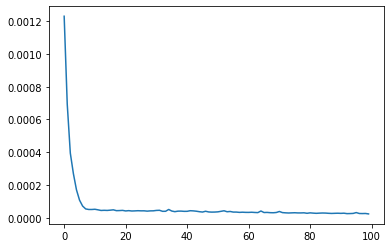

In [29]:
plt.plot(Hist_2.history['loss'])
plt.show()

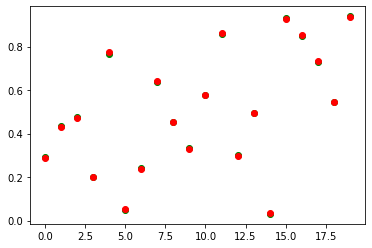

In [31]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')
plt.show()

In [32]:
# 3. Stacked_SimpleRNN

# return_sequences = True

model_3 = models.Sequential(name='Stacked_RNN')
model_3.add(layers.SimpleRNN(3,
                             input_shape=(None,1),
                             return_sequences=True))
model_3.add(layers.SimpleRNN(3,
                             input_shape=(None,1),
                             return_sequences=False))
model_3.add(layers.Dense(1))

model_3.summary()

Model: "Stacked_RNN"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
simple_rnn_2 (SimpleRNN)     (None, None, 3)           15        
_________________________________________________________________
simple_rnn_3 (SimpleRNN)     (None, 3)                 21        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 40
Trainable params: 40
Non-trainable params: 0
_________________________________________________________________


In [33]:
model_3.compile(loss='mse',
                optimizer='adam',
                metrics=['accuracy'])

In [34]:
Hist_3 = model_3.fit(X_train, y_train,
                     epochs=100,
                     batch_size=8,
                     validation_data=(X_test, y_test))

Epoch 1/100
10/10 [==============================] - 1s 34ms/step - loss: 0.0987 - accuracy: 0.0250 - val_loss: 0.0318 - val_accuracy: 0.0000e+00
Epoch 2/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0356 - accuracy: 0.0250 - val_loss: 0.0349 - val_accuracy: 0.0000e+00
Epoch 3/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0313 - accuracy: 0.0250 - val_loss: 0.0200 - val_accuracy: 0.0000e+00
Epoch 4/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0185 - accuracy: 0.0250 - val_loss: 0.0127 - val_accuracy: 0.0000e+00
Epoch 5/100
10/10 [==============================] - 0s 4ms/step - loss: 0.0124 - accuracy: 0.0250 - val_loss: 0.0081 - val_accuracy: 0.0000e+00
Epoch 6/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0082 - accuracy: 0.0250 - val_loss: 0.0056 - val_accuracy: 0.0000e+00
Epoch 7/100
10/10 [==============================] - 0s 5ms/step - loss: 0.0051 - accuracy: 0.0250 - val_loss: 0.0038 - val_accur

In [35]:
y_hat = model_3.predict(X_test)

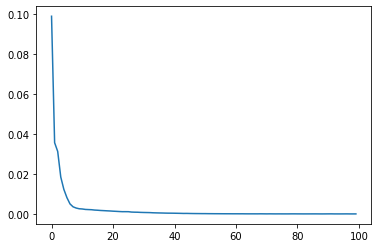

In [38]:
plt.plot(Hist_3.history['loss'])
plt.show()

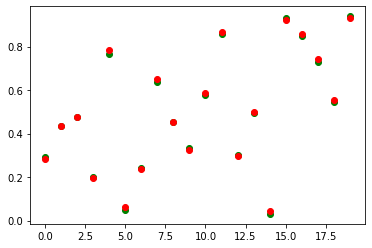

In [39]:
plt.scatter(range(20), y_test, c='g')
plt.scatter(range(20), y_hat, c='r')
plt.show()

In [40]:
# 4. 'return_sequences' Output_Options
# 'input_length'에 대한 Sequence 전체를 출력할지 설정
# 'False' vs 'True'

X = [[[(i + j)] for i in range(5)] for j in range(100)]
y = [(i + 5) for i in range(100)]

X = np.array(X, dtype = float)
y = np.array(y, dtype = float)

X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.2,
                                                    random_state=2045)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((80, 5, 1), (20, 5, 1), (80,), (20,))

In [41]:
X_test[0].reshape(1, 5, 1)

array([[[29.],
        [30.],
        [31.],
        [32.],
        [33.]]])

In [42]:
# 마지막 Output만 출력
# Unit -> 1

Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(1,
                                 input_shape=(5,1),
                                 return_sequences=False))
Model_False.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])

In [44]:
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[1.]], dtype=float32)

In [45]:
# 마지막 Output만 출력
# Unit -> 3

Model_False = models.Sequential()
Model_False.add(layers.SimpleRNN(3,
                                 input_shape=(5,1),
                                 return_sequences=False))
Model_False.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])
Model_False.predict(X_test[0].reshape(1, 5, 1))

array([[ 1., -1., -1.]], dtype=float32)

In [47]:
# 매 순환마다 Output 출력
# Unit -> 1
# input_length -> 5

Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(1,
                                 input_shape=(5,1),
                                 return_sequences=True))
Model_True.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[1.],
        [1.],
        [1.],
        [1.],
        [1.]]], dtype=float32)

In [48]:
# Unit -> 3
# input_length -> 5

Model_True = models.Sequential()
Model_True.add(layers.SimpleRNN(3,
                                 input_shape=(5,1),
                                 return_sequences=True))
Model_True.compile(loss='mse',
                    optimizer='adam',
                    metrics=['accuracy'])
Model_True.predict(X_test[0].reshape(1, 5, 1))

array([[[-0.9998834 , -1.        ,  1.        ],
        [-0.9999289 , -1.        ,  1.        ],
        [-0.9999492 , -1.        ,  1.        ],
        [-0.99996376, -1.        ,  1.        ],
        [-0.9999741 , -1.        ,  1.        ]]], dtype=float32)